# Kütüphanelerin Yüklenmesi 📚

In [205]:
# Veri Manipülasyonu ve Analizi
import numpy as np  
import pandas as pd  
import os
import random


# Veri Görselleştirme
import matplotlib.pyplot as plt  
import seaborn as sns  
import missingno as msno 

# Model Oluşturma
from sklearn.model_selection import train_test_split, GridSearchCV, KFold  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Algoritmalar
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Model Değerlendirme
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix


Bu bölümde Kalp Yetmezliği veri analizi ve makine öğrenmesi için gerekli tüm kütüphaneler içe aktarılır:

	•	Veri Analizi: numpy, pandas
	•	Görselleştirme: matplotlib, seaborn, missingno
	•	Modelleme: scikit-learn’in çeşitli alt modülleri
	•	Veri bölme ve çapraz doğrulama: train_test_split, KFold
	•	Modelleme: RandomForestClassifier, GradientBoostingClassifier, vb.
	•	Pipeline ve ölçekleme: Pipeline, StandardScaler
	•	Değerlendirme metrikleri: accuracy_score, classification_report, confusion_matrix

-----

# 1. Veri Setini Yükleme ve Analiz Etme 📌 

In [206]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Bu adımda, Kalp Yetmezliği veri seti .csv dosyasından içe aktarılır ve df.info() komutu ile yapısal özellikleri incelenir:

	•	Kaç satır ve sütun olduğu
	•	Hangi sütunlarda eksik veri olup olmadığı
	•	Veri türleri (int, float, object)

Bu genel bakış, veri ön işleme ve temizlik işlemleri için büyük bir önem arz etmektedir.

-----

In [207]:
print(f"Veri kümesi şunları içerir {len(df.columns)} sütunlar:")
print(list(df.columns))

Veri kümesi şunları içerir 12 sütunlar:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [208]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 2. Değişkenlerin Anlamları ve Tanımları (Veri Sözlüğü) 📌

------

**1. Age =** Hastanın yaşı (yıl cinsinden). Sürekli sayısal bir değerdir.

**2. Sex =** Hastanın cinsiyeti. Erkek hastalar için "1", kadınlar için "0" kullanılır.

**3. ChestPainType =** Hastanın yaşadığı göğüs ağrısı tipi:

    TA: Tipik anjina (kalbe bağlı klasik göğüs ağrısı)

    ATA: Atipik anjina (kalbe tam bağlı olmayan göğüs ağrısı)

    NAP: Kalple ilişkili olmayan ağrı

    ASY: Belirti göstermeyen

**4. RestingBP =** Hastanın istirahat halindeki kan basıncı (mmHg cinsinden).

**5. Cholesterol =** Hastanın kolesterol seviyesi (mg/dL). Sürekli sayısal değişkendir.

**6. FastingBS =** Açlık kan şekeri 120 mg/dL’den yüksek mi?

    "1": Evet

    "0": Hayır

**7. RestingECG =** EKG (elektrokardiyografi) sonuç durumu:

    Normal

    ST: ST-T dalga bozukluğu

    LVH: Sol ventrikül büyümesi işareti

**8. MaxHR =** Hastanın egzersiz sırasında ulaştığı maksimum kalp atış hızı.

**9. ExerciseAngina =** Egzersiz sırasında göğüs ağrısı oluşup oluşmadığını belirtir.

    "1": Evet

    "0": Hayır

**10. Oldpeak =** Egzersiz sonrası ST segmentinde görülen düşüklük değeri.

**11. ST_Slope =** Egzersiz sırasındaki ST segmentinin eğimi:

    Up: Yükselen

    Flat: Düz

    Down: Azalan

**12. HeartDisease =** Kalp hastalığı teşhisi.

    "1": Kalp hastalığı var

    "0": Yok

# 3. Veri Setindeki Eksik Değerleri Yönetme 📌 

In [209]:
# Eksik değerlerin kontrol edilmesi
missing_data = df.isnull().sum()
print("Eksik veri sayısı:")
print(missing_data)

# Eksik verilerin yüzdesini hesaplama
total_percentage = (missing_data.sum() / df.shape[0]) * 100
print(f"Eksik verilerin toplam yüzdesi: {round(total_percentage, 2)}%")

Eksik veri sayısı:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Eksik verilerin toplam yüzdesi: 0.0%


In [210]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [211]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Oldpeak değerinin - tipinde olması şüpheli bir yaklaşımı peşinde getirmektedir. Doktorlar ile görüştüğümüzde bu değerin düşük bir oranda olsa görülebileceğini söylemiştir.

## 4. Değişkenlerin Kategorik veya Sayısal Olarak Sınıflandırılması 📌

Burada Age,Toplam Kolestrol(Cholesterol),Sistolik Tansiyon(RestingBP),Oldpeak değerini doktorlardan almış olduğumuz eşik değerlerine göre kategorize ediyoruz.

In [212]:
df=df.drop(["ChestPainType"],axis=1)

In [213]:
conditions_Age =[
    df['Age'] <55,
    df['Age'] >=55
]
choices_Age=['55 yaş altı','55 yaş üstü']
df['Age']=np.select(conditions_Age,choices_Age,default="Bilinmiyor")


conditions_totChol=[
    df['Cholesterol'] < 200,
    df['Cholesterol'] >= 200
]
choices_totChol=['Düşük Kolesterol','Yüksek Kolesterol']
df['Cholesterol'] = np.select(conditions_totChol, choices_totChol, default="Bilinmiyor")

conditions_SysBp=[
    df['RestingBP'] < 135,
    df['RestingBP'] >= 135
]
choices_SysBp=['Düşük Dinlenme Kan Basıncı','Yüksek Dinlenme Kan Basıncı']
df['RestingBP'] = np.select(conditions_SysBp,choices_SysBp,default="Bilinmiyor")

conditions_Oldpeak = [
    (df['Oldpeak'] < 0) | (df['Oldpeak'] > 2),           
    (df['Oldpeak'] >= 0) & (df['Oldpeak'] <= 2)          
]
choices_Oldpeak=["Yüksek Riskli Oldpeak","Normal Oldpeak"]
df['Oldpeak']=np.select(conditions_Oldpeak,choices_Oldpeak,default="Bilinmiyor")


In [214]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,55 yaş altı,M,Yüksek Dinlenme Kan Basıncı,Yüksek Kolesterol,0,Normal,172,N,Normal Oldpeak,Up,0
1,55 yaş altı,F,Yüksek Dinlenme Kan Basıncı,Düşük Kolesterol,0,Normal,156,N,Normal Oldpeak,Flat,1
2,55 yaş altı,M,Düşük Dinlenme Kan Basıncı,Yüksek Kolesterol,0,ST,98,N,Normal Oldpeak,Up,0
3,55 yaş altı,F,Yüksek Dinlenme Kan Basıncı,Yüksek Kolesterol,0,Normal,108,Y,Normal Oldpeak,Flat,1
4,55 yaş altı,M,Yüksek Dinlenme Kan Basıncı,Düşük Kolesterol,0,Normal,122,N,Normal Oldpeak,Up,0


Verilerimize uygun kategorik değişkenlerin tipine dönüşümünü yapıyoruz.

In [215]:
# df['Sex'] = df['Sex'].astype('category')
# df['Age'] = df['Age'].astype('category')
# df['RestingBP'] = df['RestingBP'].astype('category')
# df['Cholesterol'] = df['Cholesterol'].astype('category')
# df['FastingBS'] = df['FastingBS'].astype('category')
# df['RestingECG'] = df['RestingECG'].astype('category')
# df['ExerciseAngina'] = df['ExerciseAngina'].astype('category')
# df['Oldpeak'] = df['Oldpeak'].astype('category')
# df['ST_Slope'] = df['ST_Slope'].astype('category')
# df['HeartDisease'] = df['HeartDisease'].astype('category')
# df.info()
# df.head()


In [216]:
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Sex'] = le.fit_transform(df['Sex'])
df['RestingBP'] = le.fit_transform(df['RestingBP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['FastingBS'] = le.fit_transform(df['FastingBS'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['Oldpeak'] = le.fit_transform(df['Oldpeak'])
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,1,1,1,0,Normal,172,0,0,Up,0
1,0,0,1,0,0,Normal,156,0,0,Flat,1
2,0,1,0,1,0,ST,98,0,0,Up,0
3,0,0,1,1,0,Normal,108,1,0,Flat,1
4,0,1,1,0,0,Normal,122,0,0,Up,0


Aralarında ikili ilişki bulunan değerleri label encoding yöntemi ile ayırdık. RestingECG ve ST_Slope değerleri 3 değişkenden oluştuğu için ve aralarında sıralama ilişkisi yapılmaması gerektiğinden one hot encoding işlemine tabi tutulur.

In [217]:
# One-hot encoding işlemi
df = pd.get_dummies(df, columns=["RestingECG", "ST_Slope"], prefix=["ECG", "Slope"])
df.head()



,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ECG_LVH,ECG_Normal,ECG_ST,Slope_Down,Slope_Flat,Slope_Up
0,0,1,1,1,0,172,0,0,0,False,True,False,False,False,True
1,0,0,1,0,0,156,0,0,1,False,True,False,False,True,False
2,0,1,0,1,0,98,0,0,0,False,False,True,False,False,True
3,0,0,1,1,0,108,1,0,1,False,True,False,False,True,False
4,0,1,1,0,0,122,0,0,0,False,True,False,False,False,True


In [218]:
df['ECG_LVH'] = df['ECG_LVH'].astype('int')
df['ECG_Normal'] = df['ECG_Normal'].astype('int')
df['ECG_ST'] = df['ECG_ST'].astype('int')
df['Slope_Down'] = df['Slope_Down'].astype('int')
df['Slope_Flat'] = df['Slope_Flat'].astype('int')
df['Slope_Up'] = df['Slope_Up'].astype('int')
df.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ECG_LVH,ECG_Normal,ECG_ST,Slope_Down,Slope_Flat,Slope_Up
0,0,1,1,1,0,172,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,156,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,98,0,0,0,0,0,1,0,0,1
3,0,0,1,1,0,108,1,0,1,0,1,0,0,1,0
4,0,1,1,0,0,122,0,0,0,0,1,0,0,0,1


In [219]:
df.tail()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ECG_LVH,ECG_Normal,ECG_ST,Slope_Down,Slope_Flat,Slope_Up
913,0,1,0,1,0,132,0,0,1,0,1,0,0,1,0
914,1,1,1,0,1,141,0,1,1,0,1,0,0,1,0
915,1,1,0,0,0,115,1,0,1,0,1,0,0,1,0
916,1,0,0,1,0,174,0,0,1,1,0,0,0,1,0
917,0,1,1,0,0,173,0,0,0,0,1,0,0,0,1


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int64
 2   RestingBP       918 non-null    int64
 3   Cholesterol     918 non-null    int64
 4   FastingBS       918 non-null    int64
 5   MaxHR           918 non-null    int64
 6   ExerciseAngina  918 non-null    int64
 7   Oldpeak         918 non-null    int64
 8   HeartDisease    918 non-null    int64
 9   ECG_LVH         918 non-null    int64
 10  ECG_Normal      918 non-null    int64
 11  ECG_ST          918 non-null    int64
 12  Slope_Down      918 non-null    int64
 13  Slope_Flat      918 non-null    int64
 14  Slope_Up        918 non-null    int64
dtypes: int64(15)
memory usage: 107.7 KB


## 5. İstatistiksel Analiz Ve  Veri Görselleştirme 📌

### 5.1 MaxHR ve Kalp Yetmezliği Durumu

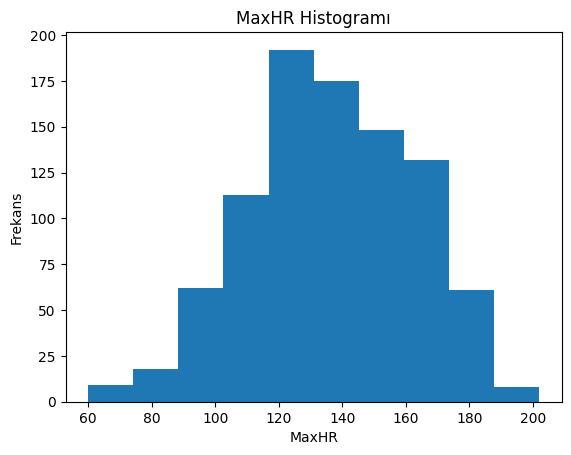

In [221]:
plt.hist(df["MaxHR"]) 
plt.title("MaxHR Histogramı")
plt.xlabel("MaxHR")
plt.ylabel("Frekans")
plt.show()


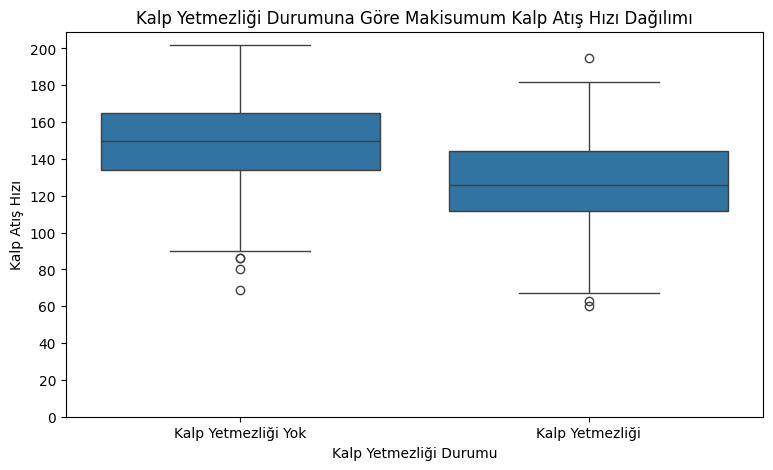

In [222]:
plt.figure(figsize=(9, 5))
sns.boxplot(x='HeartDisease', y='MaxHR', data=df)
plt.title('Kalp Yetmezliği Durumuna Göre Makisumum Kalp Atış Hızı Dağılımı')
plt.xlabel('Kalp Yetmezliği Durumu')
plt.ylabel('Kalp Atış Hızı')
plt.xticks([0, 1], ['Kalp Yetmezliği Yok', 'Kalp Yetmezliği'])

bmi_ticks = range(0, int(df['MaxHR'].max())+5, 20)
plt.yticks(bmi_ticks)
plt.show()

### 5.2 Yaş ve Kalp Yetmezliği Durumu

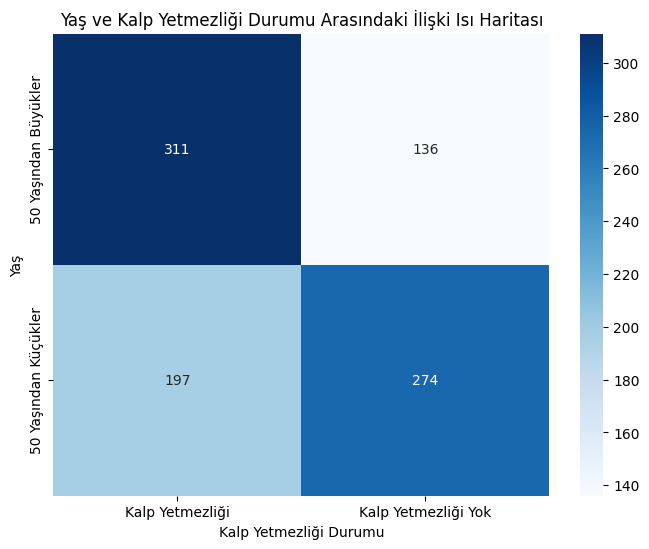

In [223]:
# Cinsiyet ve Hipertansiyon arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table = pd.crosstab(df['Age'].map({0: '50 Yaşından Küçükler', 1: '50 Yaşından Büyükler'}),
                                df['HeartDisease'].map({0: 'Kalp Yetmezliği Yok', 1: 'Kalp Yetmezliği'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Yaş ve Kalp Yetmezliği Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Kalp Yetmezliği Durumu')
plt.ylabel('Yaş')
plt.show()

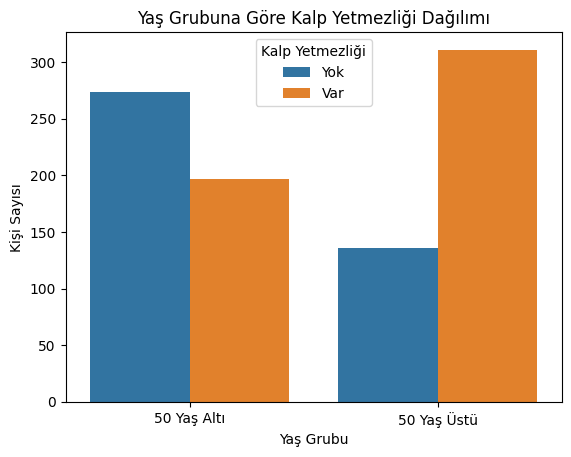

In [224]:
sns.countplot(data=df, 
              x=df['Age'].map({0: '50 Yaş Altı', 1: '50 Yaş Üstü'}), 
              hue=df['HeartDisease'].map({0: 'Yok', 1: 'Var'}))

plt.title('Yaş Grubuna Göre Kalp Yetmezliği Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Kalp Yetmezliği')
plt.show()


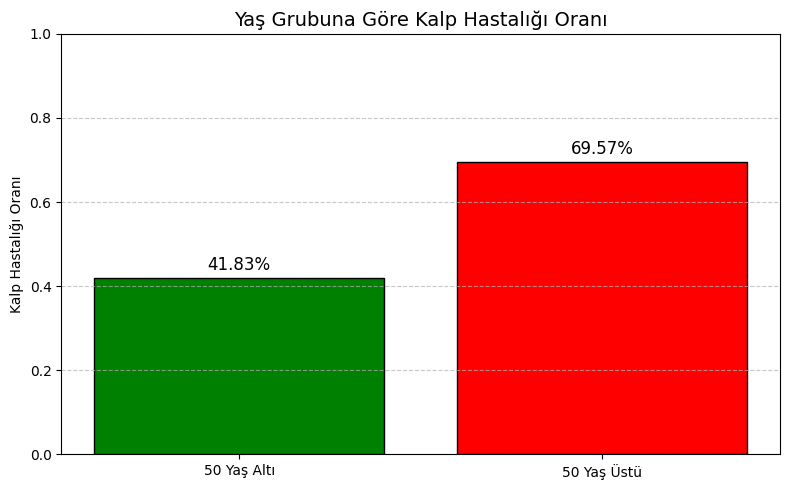

In [225]:
# Yaş grubu için verilerin ayrıştırılması
Heart_age_under50 = len(df[(df['Age'] == 0) & (df['HeartDisease'] == 1)])
total_under50 = len(df[df['Age'] == 0])

Heart_age_over50 = len(df[(df['Age'] == 1) & (df['HeartDisease'] == 1)])
total_over50 = len(df[df['Age'] == 1])

# Oran hesaplama
Heart_rate_under50 = Heart_age_under50 / total_under50 if total_under50 != 0 else 0
Heart_rate_over50 = Heart_age_over50 / total_over50 if total_over50 != 0 else 0

# Çubuk grafiği için veriler
labels = ['50 Yaş Altı', '50 Yaş Üstü']
rates = [Heart_rate_under50, Heart_rate_over50]

# Grafik
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik yazılar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Yaş Grubuna Göre Kalp Hastalığı Oranı', fontsize=14)
plt.ylabel('Kalp Hastalığı Oranı')
plt.ylim(0, 1)  # oranlar 0–1 arasında
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.3 Cinsiyet ve Kalp Yetmezliği Durumu

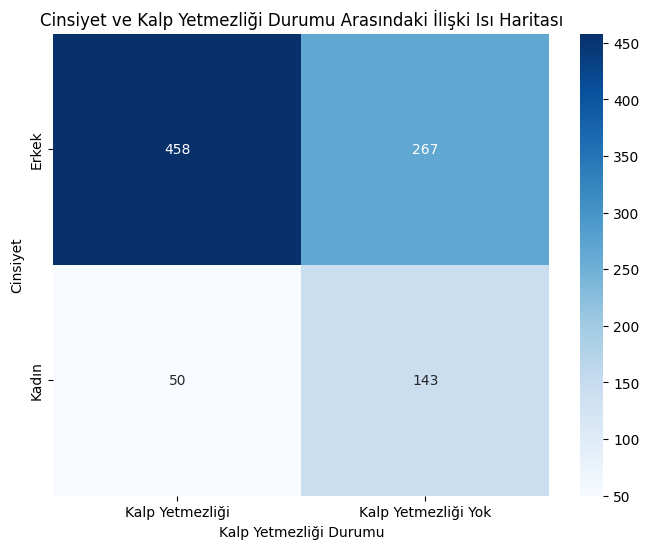

In [226]:
# Cinsiyet ve Kalp Yetmezliği arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table = pd.crosstab(df['Sex'].map({0: 'Kadın', 1: 'Erkek'}),
                                df['HeartDisease'].map({0: 'Kalp Yetmezliği Yok', 1: 'Kalp Yetmezliği'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Cinsiyet ve Kalp Yetmezliği Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Kalp Yetmezliği Durumu')
plt.ylabel('Cinsiyet')
plt.show()

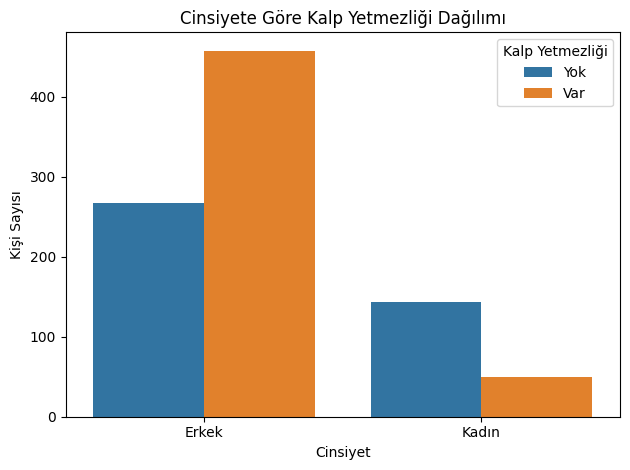

In [227]:
sns.countplot(data=df, 
              x=df['Sex'].map({0: 'Kadın', 1: 'Erkek'}), 
              hue=df['HeartDisease'].map({0: 'Yok', 1: 'Var'}))

plt.title('Cinsiyete Göre Kalp Yetmezliği Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Kalp Yetmezliği')
plt.tight_layout()
plt.show()


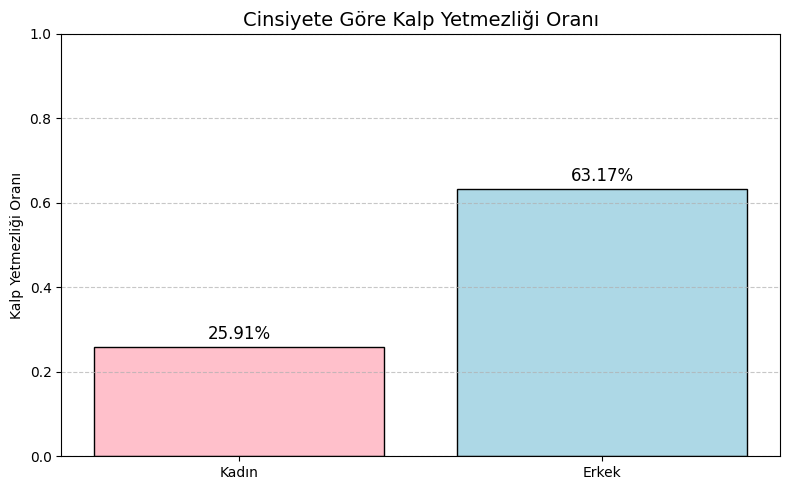

In [228]:
# Cinsiyete göre kalp hastalığı oranlarını hesapla
Heart_female = len(df[(df['Sex'] == 0) & (df['HeartDisease'] == 1)])
Total_female = len(df[df['Sex'] == 0])

Heart_male = len(df[(df['Sex'] == 1) & (df['HeartDisease'] == 1)])
Total_male = len(df[df['Sex'] == 1])

Rate_female = Heart_female / Total_female if Total_female != 0 else 0
Rate_male = Heart_male / Total_male if Total_male != 0 else 0

# Grafik verileri
labels = ['Kadın', 'Erkek']
rates = [Rate_female, Rate_male]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['pink', 'lightblue'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Cinsiyete Göre Kalp Yetmezliği Oranı', fontsize=14)
plt.ylabel('Kalp Yetmezliği Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.4 RestingBP(Büyük Tansiyon) ve Kalp Yetmezliği Durumu

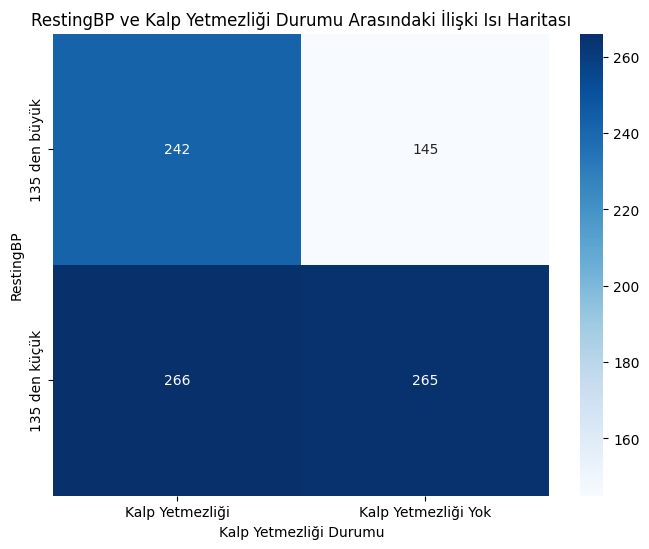

In [229]:
# RestingBP ve Kalp Yetmezliği arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table = pd.crosstab(df['RestingBP'].map({0: '135 den küçük', 1: '135 den büyük'}),
                                df['HeartDisease'].map({0: 'Kalp Yetmezliği Yok', 1: 'Kalp Yetmezliği'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('RestingBP ve Kalp Yetmezliği Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Kalp Yetmezliği Durumu')
plt.ylabel('RestingBP')
plt.show()

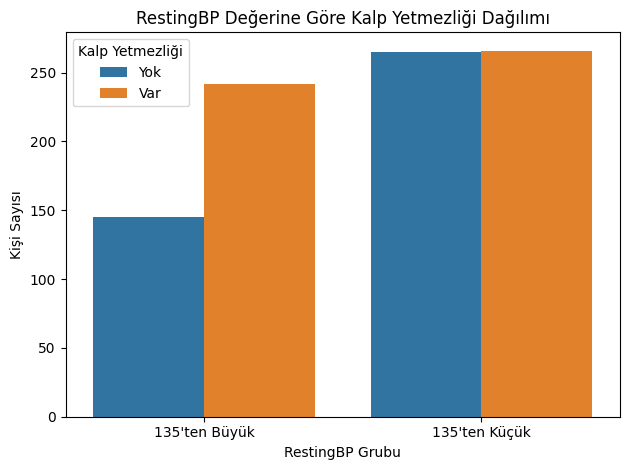

In [230]:
sns.countplot(data=df, 
              x=df['RestingBP'].map({0: '135\'ten Küçük', 1: '135\'ten Büyük'}), 
              hue=df['HeartDisease'].map({0: 'Yok', 1: 'Var'}))

plt.title('RestingBP Değerine Göre Kalp Yetmezliği Dağılımı')
plt.xlabel('RestingBP Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Kalp Yetmezliği')
plt.tight_layout()
plt.show()


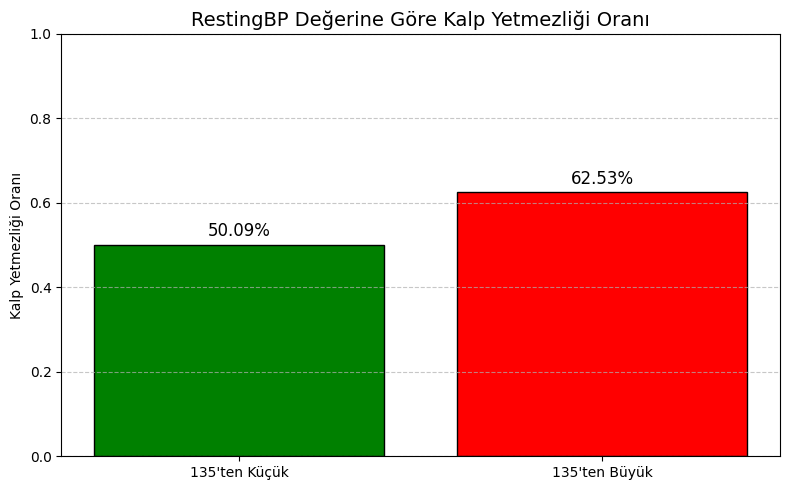

In [231]:
# RestingBP kategorilerine göre kalp hastalığı oranlarını hesapla
Heart_low = len(df[(df['RestingBP'] == 0) & (df['HeartDisease'] == 1)])
Total_low = len(df[df['RestingBP'] == 0])

Heart_high = len(df[(df['RestingBP'] == 1) & (df['HeartDisease'] == 1)])
Total_high = len(df[df['RestingBP'] == 1])

Rate_low = Heart_low / Total_low if Total_low != 0 else 0
Rate_high = Heart_high / Total_high if Total_high != 0 else 0

# Grafik verileri
labels = ['135\'ten Küçük', '135\'ten Büyük']
rates = [Rate_low, Rate_high]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('RestingBP Değerine Göre Kalp Yetmezliği Oranı', fontsize=14)
plt.ylabel('Kalp Yetmezliği Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.5 Toplam Kolesterol ve Kalp Yetmezliği Durumu

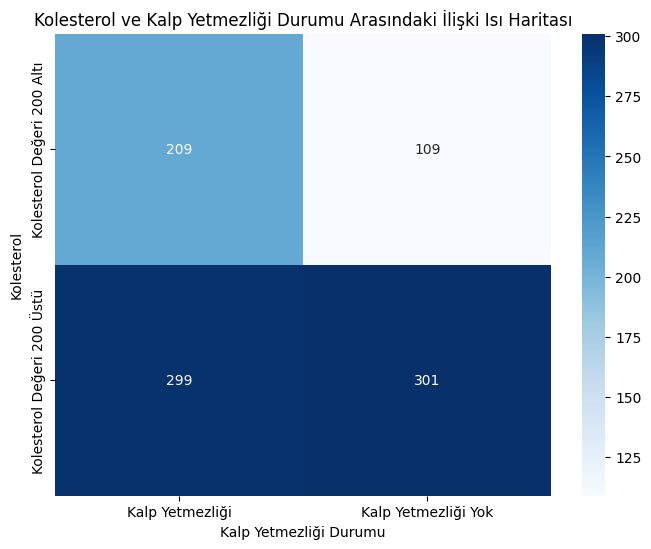

In [232]:
contingency_table = pd.crosstab(df['Cholesterol'].map({0: 'Kolesterol Değeri 200 Altı', 1: 'Kolesterol Değeri 200 Üstü'}),
                                df['HeartDisease'].map({0: 'Kalp Yetmezliği Yok', 1: 'Kalp Yetmezliği'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Kolesterol ve Kalp Yetmezliği Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Kalp Yetmezliği Durumu')
plt.ylabel('Kolesterol')
plt.show()

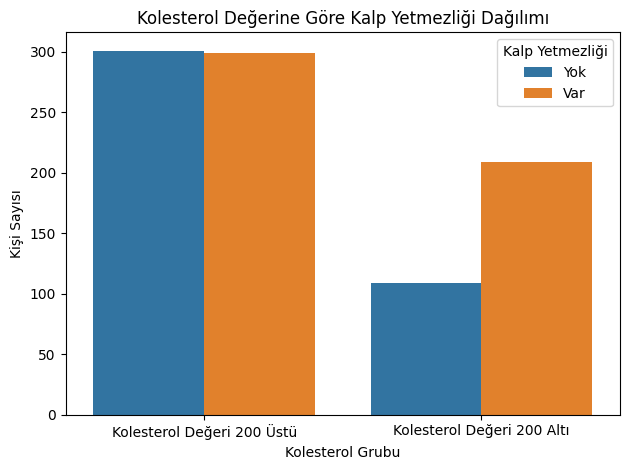

In [233]:
sns.countplot(data=df, 
              x=df['Cholesterol'].map({0: 'Kolesterol Değeri 200 Altı', 1: 'Kolesterol Değeri 200 Üstü'}), 
              hue=df['HeartDisease'].map({0: 'Yok', 1: 'Var'}))

plt.title('Kolesterol Değerine Göre Kalp Yetmezliği Dağılımı')
plt.xlabel('Kolesterol Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Kalp Yetmezliği')
plt.tight_layout()
plt.show()


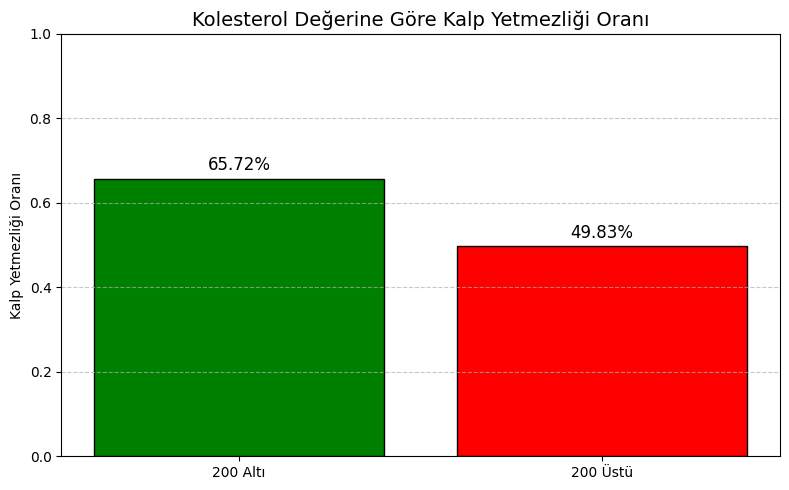

In [234]:
# Kolesterol kategorilerine göre kalp hastalığı oranlarını hesapla
Heart_low = len(df[(df['Cholesterol'] == 0) & (df['HeartDisease'] == 1)])
Total_low = len(df[df['Cholesterol'] == 0])

Heart_high = len(df[(df['Cholesterol'] == 1) & (df['HeartDisease'] == 1)])
Total_high = len(df[df['Cholesterol'] == 1])

Rate_low = Heart_low / Total_low if Total_low != 0 else 0
Rate_high = Heart_high / Total_high if Total_high != 0 else 0

# Grafik verileri
labels = ['200 Altı', '200 Üstü']
rates = [Rate_low, Rate_high]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Kolesterol Değerine Göre Kalp Yetmezliği Oranı', fontsize=14)
plt.ylabel('Kalp Yetmezliği Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.6 Glikoz ve Kalp Yetmezliği Durumu

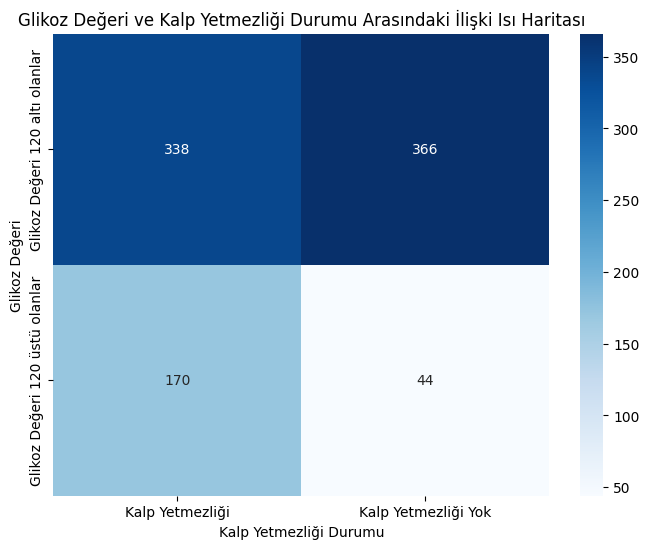

In [235]:
contingency_table = pd.crosstab(df['FastingBS'].map({0: 'Glikoz Değeri 120 altı olanlar', 1: 'Glikoz Değeri 120 üstü olanlar'}),
                                df['HeartDisease'].map({0: 'Kalp Yetmezliği Yok', 1: 'Kalp Yetmezliği'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Glikoz Değeri ve Kalp Yetmezliği Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Kalp Yetmezliği Durumu')
plt.ylabel('Glikoz Değeri')
plt.show()

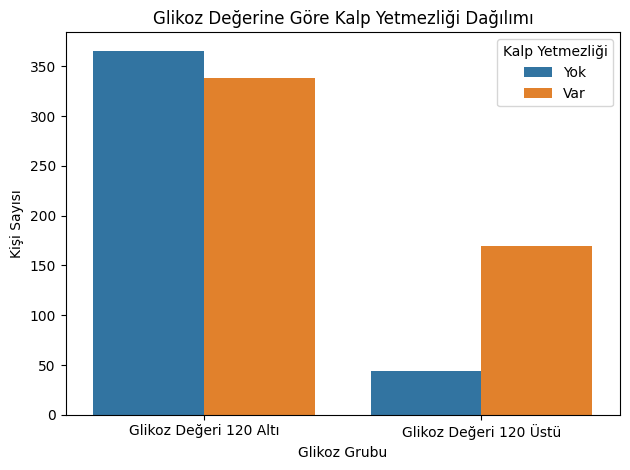

In [236]:
sns.countplot(data=df, 
              x=df['FastingBS'].map({0: 'Glikoz Değeri 120 Altı', 1: 'Glikoz Değeri 120 Üstü'}), 
              hue=df['HeartDisease'].map({0: 'Yok', 1: 'Var'}))

plt.title('Glikoz Değerine Göre Kalp Yetmezliği Dağılımı')
plt.xlabel('Glikoz Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Kalp Yetmezliği')
plt.tight_layout()
plt.show()


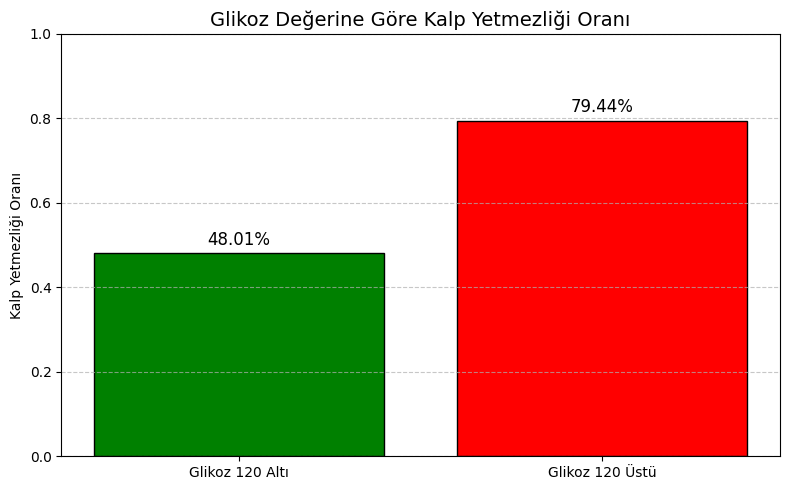

In [237]:
# Glikoz kategorilerine göre kalp hastalığı oranlarını hesapla
Heart_low = len(df[(df['FastingBS'] == 0) & (df['HeartDisease'] == 1)])
Total_low = len(df[df['FastingBS'] == 0])

Heart_high = len(df[(df['FastingBS'] == 1) & (df['HeartDisease'] == 1)])
Total_high = len(df[df['FastingBS'] == 1])

Rate_low = Heart_low / Total_low if Total_low != 0 else 0
Rate_high = Heart_high / Total_high if Total_high != 0 else 0

# Grafik verileri
labels = ['Glikoz 120 Altı', 'Glikoz 120 Üstü']
rates = [Rate_low, Rate_high]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Glikoz Değerine Göre Kalp Yetmezliği Oranı', fontsize=14)
plt.ylabel('Kalp Yetmezliği Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.7 Egzersiz Ağrısı ve Kalp Yetmezliği Durumu

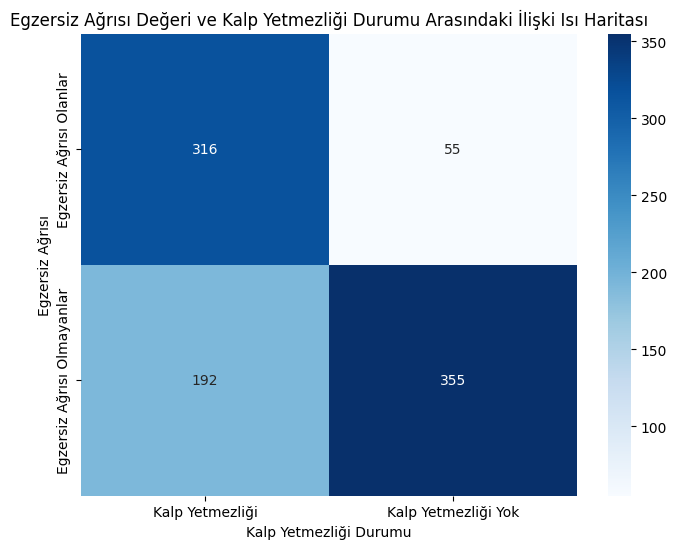

In [238]:
contingency_table = pd.crosstab(df['ExerciseAngina'].map({0: 'Egzersiz Ağrısı Olmayanlar', 1: 'Egzersiz Ağrısı Olanlar'}),
                                df['HeartDisease'].map({0: 'Kalp Yetmezliği Yok', 1: 'Kalp Yetmezliği'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Egzersiz Ağrısı Değeri ve Kalp Yetmezliği Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Kalp Yetmezliği Durumu')
plt.ylabel('Egzersiz Ağrısı')
plt.show()

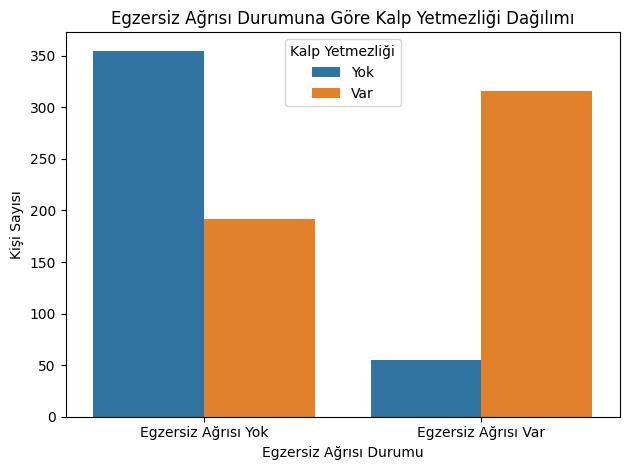

In [239]:
sns.countplot(data=df, 
              x=df['ExerciseAngina'].map({0: 'Egzersiz Ağrısı Yok', 1: 'Egzersiz Ağrısı Var'}), 
              hue=df['HeartDisease'].map({0: 'Yok', 1: 'Var'}))

plt.title('Egzersiz Ağrısı Durumuna Göre Kalp Yetmezliği Dağılımı')
plt.xlabel('Egzersiz Ağrısı Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Kalp Yetmezliği')
plt.tight_layout()
plt.show()


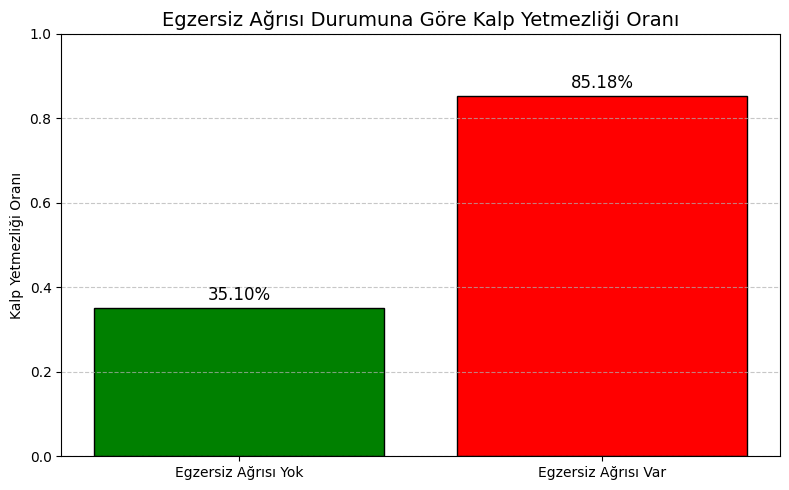

In [240]:
# Egzersiz ağrısı kategorilerine göre kalp hastalığı oranlarını hesapla
Heart_no_angina = len(df[(df['ExerciseAngina'] == 0) & (df['HeartDisease'] == 1)])
Total_no_angina = len(df[df['ExerciseAngina'] == 0])

Heart_yes_angina = len(df[(df['ExerciseAngina'] == 1) & (df['HeartDisease'] == 1)])
Total_yes_angina = len(df[df['ExerciseAngina'] == 1])

Rate_no_angina = Heart_no_angina / Total_no_angina if Total_no_angina != 0 else 0
Rate_yes_angina = Heart_yes_angina / Total_yes_angina if Total_yes_angina != 0 else 0

# Grafik verileri
labels = ['Egzersiz Ağrısı Yok', 'Egzersiz Ağrısı Var']
rates = [Rate_no_angina, Rate_yes_angina]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Egzersiz Ağrısı Durumuna Göre Kalp Yetmezliği Oranı', fontsize=14)
plt.ylabel('Kalp Yetmezliği Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.8 Oldpeak ve Kalp Yetmezliği Durumu

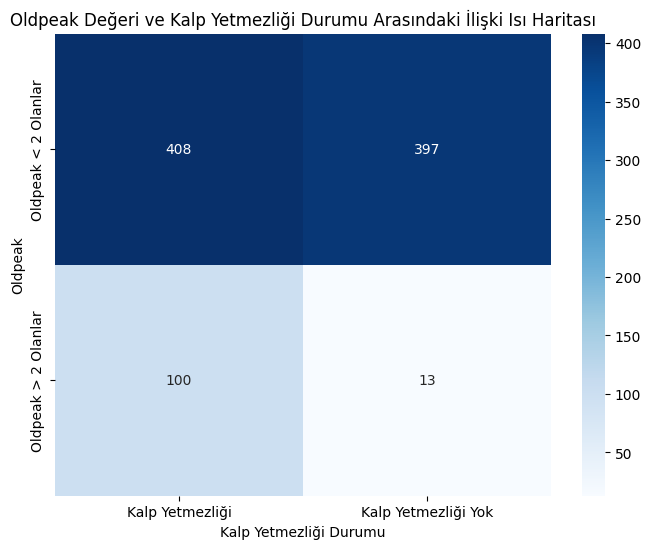

In [241]:
contingency_table = pd.crosstab(df['Oldpeak'].map({0: 'Oldpeak < 2 Olanlar', 1: 'Oldpeak > 2 Olanlar'}),
                                df['HeartDisease'].map({0: 'Kalp Yetmezliği Yok', 1: 'Kalp Yetmezliği'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Oldpeak Değeri ve Kalp Yetmezliği Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Kalp Yetmezliği Durumu')
plt.ylabel('Oldpeak')
plt.show()

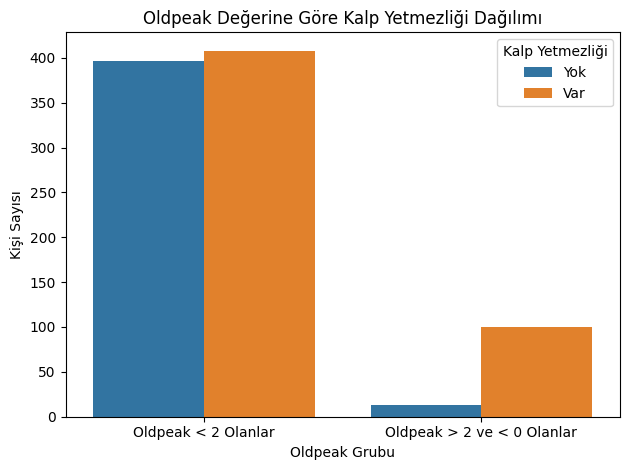

In [242]:
sns.countplot(data=df, 
              x=df['Oldpeak'].map({0: 'Oldpeak < 2 Olanlar', 1: 'Oldpeak > 2 ve < 0 Olanlar'}), 
              hue=df['HeartDisease'].map({0: 'Yok', 1: 'Var'}))

plt.title('Oldpeak Değerine Göre Kalp Yetmezliği Dağılımı')
plt.xlabel('Oldpeak Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Kalp Yetmezliği')
plt.tight_layout()
plt.show()


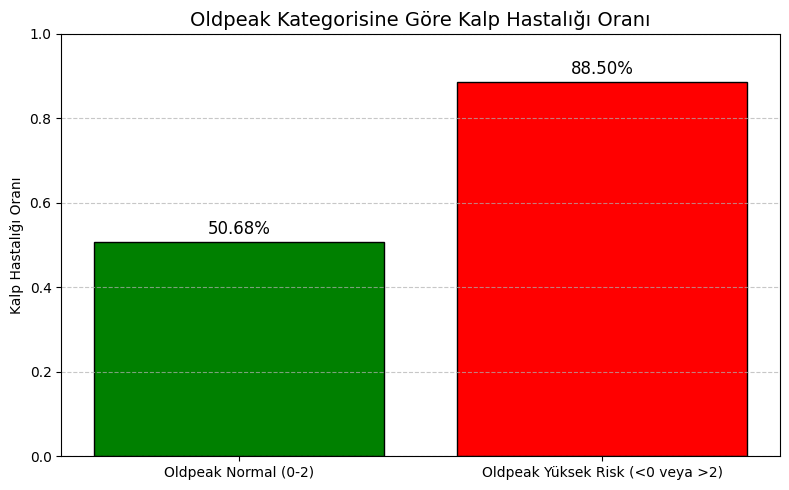

In [243]:
Heart_oldpup = len(df[(df['Oldpeak'] == 1) & (df['HeartDisease'] == 1)])  
total_oldup = len(df[df['Oldpeak'] == 1])

Heart_olddown = len(df[(df['Oldpeak'] == 0) & (df['HeartDisease'] == 1)]) 
total_olddown = len(df[df['Oldpeak'] == 0])  

Heart_rate_oldup = Heart_oldpup / total_oldup if total_oldup != 0 else 0
Heart_rate_olddown = Heart_olddown / total_olddown if total_olddown != 0 else 0

# Çubuk grafiği için veriler
labels = ['Oldpeak Normal (0-2)', 'Oldpeak Yüksek Risk (<0 veya >2)']
rates = [Heart_rate_olddown, Heart_rate_oldup]

# Grafik
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik yazılar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Oldpeak Kategorisine Göre Kalp Hastalığı Oranı', fontsize=14)
plt.ylabel('Kalp Hastalığı Oranı')
plt.ylim(0, 1)  # oranlar 0–1 arasında
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.9 RestingECG ve Kalp Yetmezliği Durumu

C:\Users\Hp\AppData\Local\Temp\ipykernel_9612\3826174897.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="HeartDisease", y="ECG_Type", data=risk_df, palette="rocket")


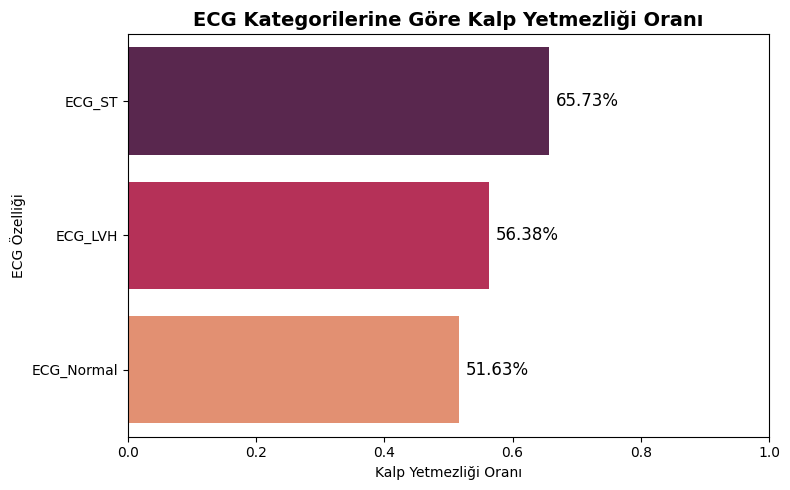

In [244]:
# One-hot sütunları
one_hot_cols = ["ECG_LVH", "ECG_Normal", "ECG_ST"]

# Kalp hastalığı oranlarını tutacak sözlük
rates = {}

for col in one_hot_cols:
    group = df[df[col] == 1]
    rate = group['HeartDisease'].mean()
    rates[col] = rate

# Verileri DataFrame'e çevir
risk_df = pd.DataFrame.from_dict(rates, orient='index', columns=["HeartDisease"])
risk_df = risk_df.sort_values(by="HeartDisease", ascending=False)
risk_df.reset_index(inplace=True)
risk_df.rename(columns={"index": "ECG_Type"}, inplace=True)

# Çubuk grafik çiz
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="HeartDisease", y="ECG_Type", data=risk_df, palette="rocket")

# Yüzdelik değerleri ekle
for i, value in enumerate(risk_df["HeartDisease"]):
    ax.text(value + 0.01, i, f'{value:.2%}', va='center', fontsize=12)

plt.title("ECG Kategorilerine Göre Kalp Yetmezliği Oranı", fontsize=14, fontweight='bold')
plt.xlabel("Kalp Yetmezliği Oranı")
plt.ylabel("ECG Özelliği")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


### 5.10 St_Slope ve Kalp Yetmezliği Durumu

C:\Users\Hp\AppData\Local\Temp\ipykernel_9612\455797667.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="HeartDisease", y="Slope_Type", data=slope_df, palette="magma")


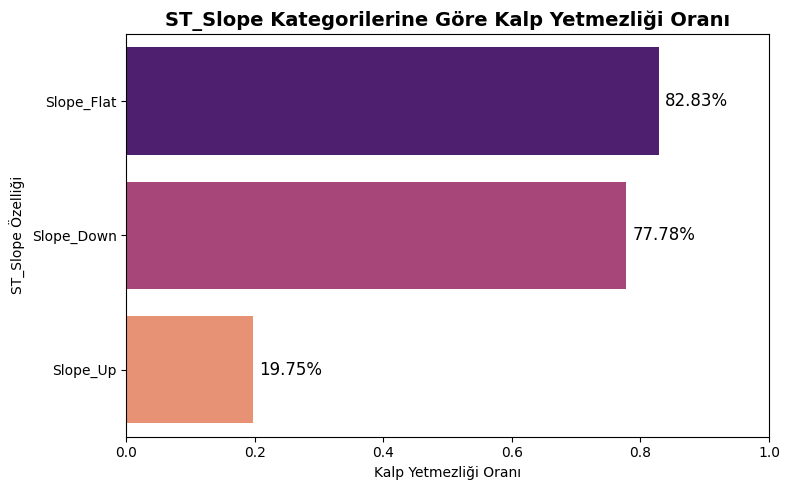

In [245]:
# One-hot sütunları
slope_cols = ["Slope_Up", "Slope_Flat", "Slope_Down"]

# Kalp hastalığı oranlarını hesapla
slope_rates = {}

for col in slope_cols:
    group = df[df[col] == 1]
    rate = group['HeartDisease'].mean()
    slope_rates[col] = rate

# DataFrame'e dönüştür
slope_df = pd.DataFrame.from_dict(slope_rates, orient='index', columns=["HeartDisease"])
slope_df = slope_df.sort_values(by="HeartDisease", ascending=False)
slope_df.reset_index(inplace=True)
slope_df.rename(columns={"index": "Slope_Type"}, inplace=True)

# Grafik çizimi
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="HeartDisease", y="Slope_Type", data=slope_df, palette="magma")

# Yüzdelik oranları çubukların üzerine yaz
for i, value in enumerate(slope_df["HeartDisease"]):
    ax.text(value + 0.01, i, f'{value:.2%}', va='center', fontsize=12)

plt.title("ST_Slope Kategorilerine Göre Kalp Yetmezliği Oranı", fontsize=14, fontweight='bold')
plt.xlabel("Kalp Yetmezliği Oranı")
plt.ylabel("ST_Slope Özelliği")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [246]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ECG_LVH,ECG_Normal,ECG_ST,Slope_Down,Slope_Flat,Slope_Up
0,0,1,1,1,0,172,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,156,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,98,0,0,0,0,0,1,0,0,1
3,0,0,1,1,0,108,1,0,1,0,1,0,0,1,0
4,0,1,1,0,0,122,0,0,0,0,1,0,0,0,1


In [247]:
# Mevcut kategorik sütunlar
categorical_columns = [
    'Sex', 'Age', 'RestingBP', 'Cholesterol', 'FastingBS',
     'ExerciseAngina', 'Oldpeak',  'HeartDisease',
        'ECG_LVH', 'ECG_Normal', 'ECG_ST',
    'Slope_Up', 'Slope_Down', 'Slope_Flat'
]

# Hepsini kategorik yap
df[categorical_columns] = df[categorical_columns].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    category
 1   Sex             918 non-null    category
 2   RestingBP       918 non-null    category
 3   Cholesterol     918 non-null    category
 4   FastingBS       918 non-null    category
 5   MaxHR           918 non-null    int64   
 6   ExerciseAngina  918 non-null    category
 7   Oldpeak         918 non-null    category
 8   HeartDisease    918 non-null    category
 9   ECG_LVH         918 non-null    category
 10  ECG_Normal      918 non-null    category
 11  ECG_ST          918 non-null    category
 12  Slope_Down      918 non-null    category
 13  Slope_Flat      918 non-null    category
 14  Slope_Up        918 non-null    category
dtypes: category(14), int64(1)
memory usage: 21.5 KB


## 6.Kalp Yetmezliği Hastalarında Değişkenler Arası Korelasyon Analizi

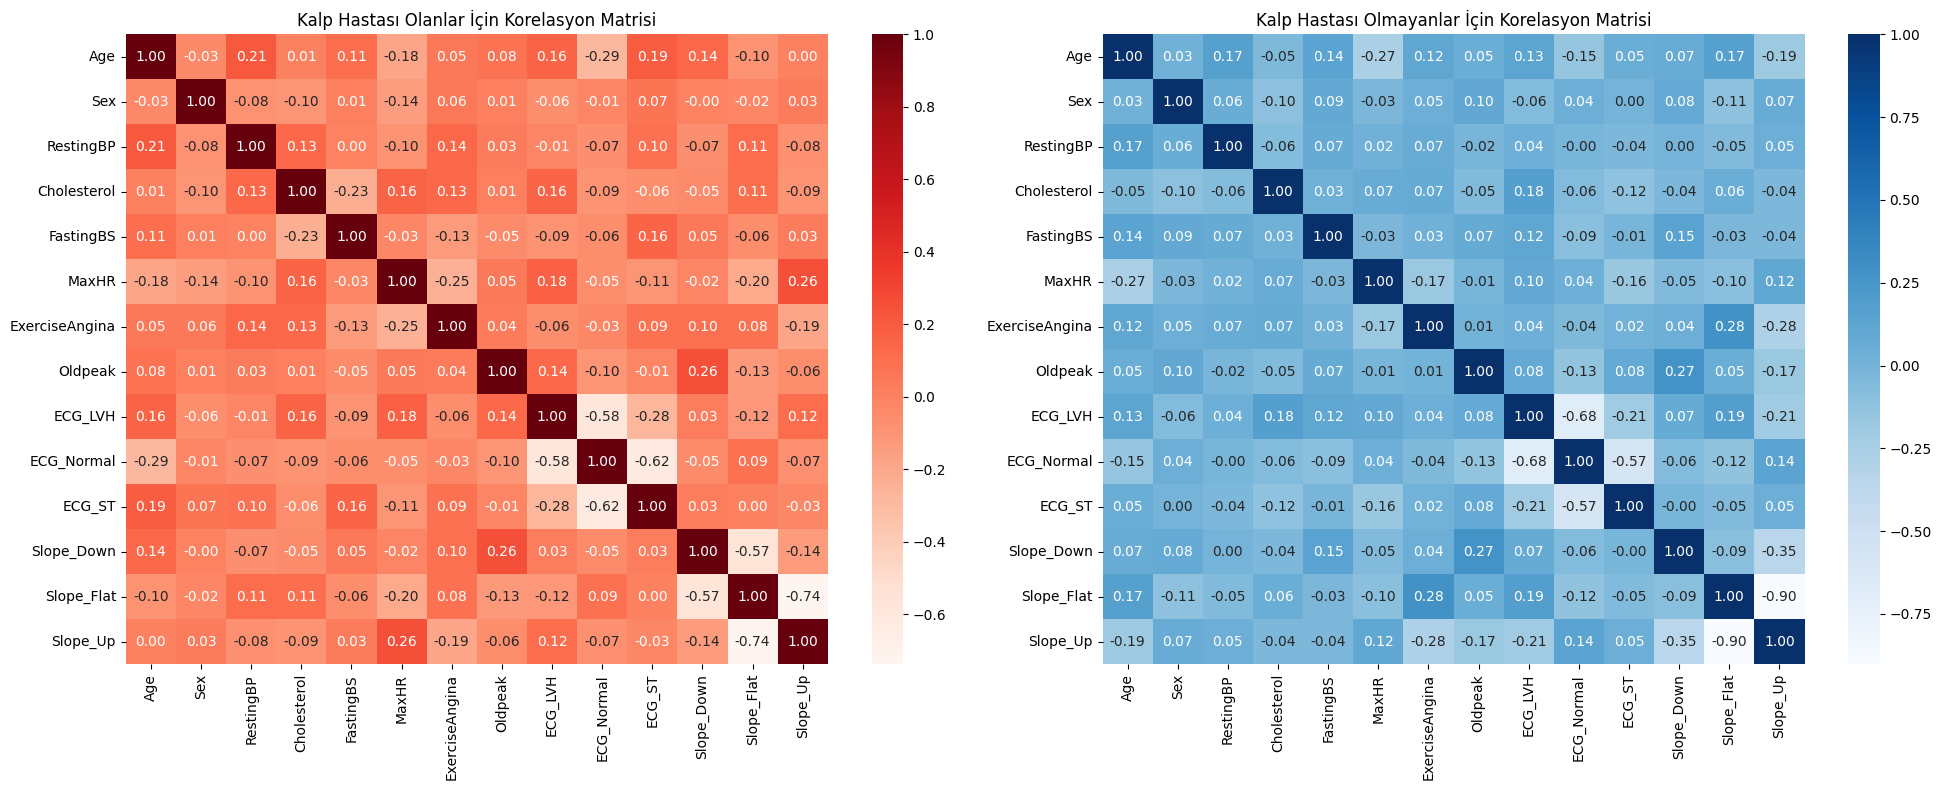

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Kalp hastası olanlar ---
df_heart = df[df['HeartDisease'] == 1].copy()
for col in df_heart.select_dtypes(include='category').columns:
    df_heart[col] = df_heart[col].cat.codes
heart_corr = df_heart.drop(columns=['HeartDisease']).corr()

# --- 2. Kalp hastası olmayanlar ---
df_healthy = df[df['HeartDisease'] == 0].copy()
for col in df_healthy.select_dtypes(include='category').columns:
    df_healthy[col] = df_healthy[col].cat.codes
healthy_corr = df_healthy.drop(columns=['HeartDisease']).corr()

# --- 3. Görselleştirme: YAN YANA heatmap ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(heart_corr, annot=True, fmt=".2f", cmap="Reds", ax=axes[0])
axes[0].set_title("Kalp Hastası Olanlar İçin Korelasyon Matrisi")

sns.heatmap(healthy_corr, annot=True, fmt=".2f", cmap="Blues", ax=axes[1])
axes[1].set_title("Kalp Hastası Olmayanlar İçin Korelasyon Matrisi")

plt.tight_layout()
plt.show()


## 7.Kalp Yetmezliği ve Diğer Değişkenler Arası Korelasyon Analizi

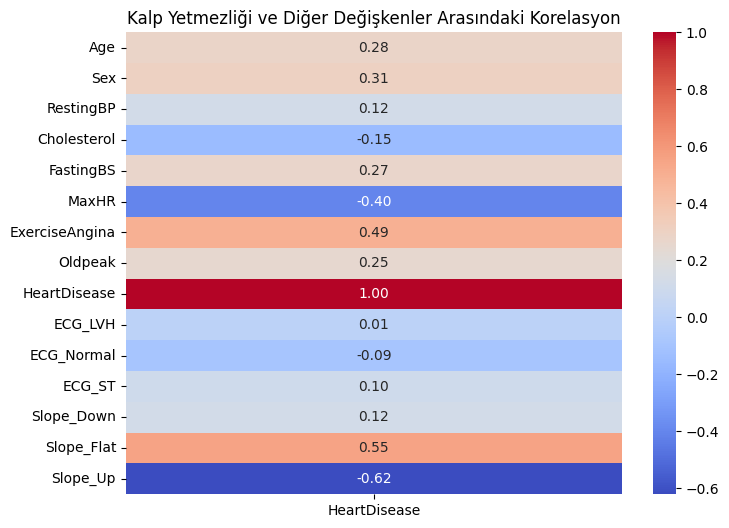

In [249]:
# Diyabet ile diğer tüm değişkenler arasındaki korelasyonu görselleştirmek için bir ısı haritası oluştur
heart_corr = df.corr() 
heart_related_corr = heart_corr[['HeartDisease']]

plt.figure(figsize=(8, 6))
sns.heatmap(heart_related_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Kalp Yetmezliği ve Diğer Değişkenler Arasındaki Korelasyon')
plt.show()

# 📌 8. Model Seçimi ve Hiperparametre Ayarlaması (GridSearchCV)

Fitting 5 folds for each of 61 candidates, totalling 305 fits
En iyi parametreler: {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
En iyi F1 skoru: 0.8693845422261732


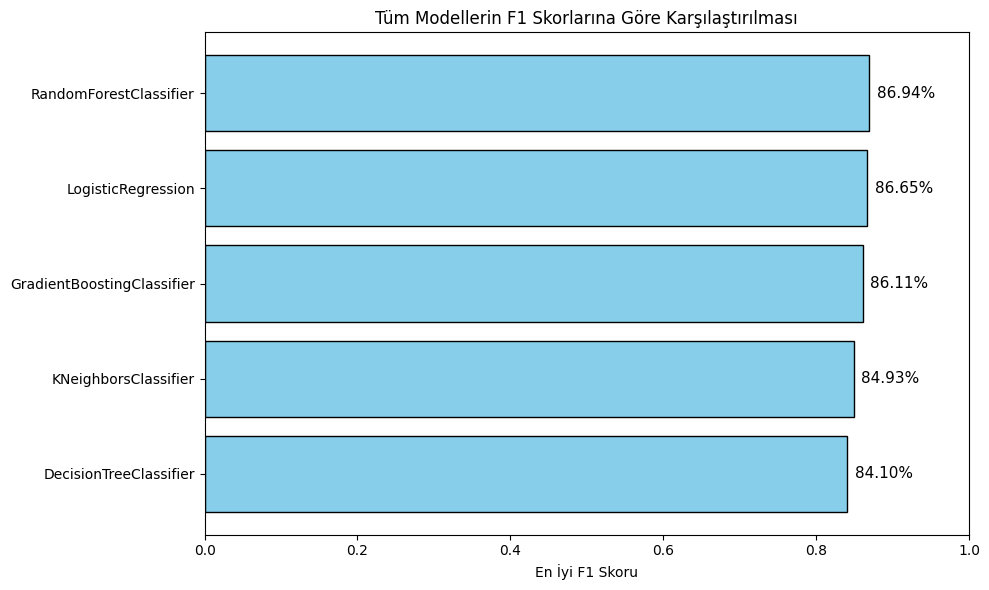

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Veriyi ayır
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Parametre ızgarası
param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=1000, solver='liblinear')],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9]
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    },
    {
        'classifier': [DecisionTreeClassifier(random_state=42)],
        'classifier__max_depth': [None, 5, 10],
        'classifier__min_samples_split': [2, 5]
    },
    {
        'classifier': [GradientBoostingClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
]

# KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=cv, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)
print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi F1 skoru: {grid_search.best_score_}")

# En iyi F1 skorlarını topla
results = pd.DataFrame(grid_search.cv_results_)
model_scores = []

for model in results['param_classifier'].unique():
    model_name = model.__class__.__name__
    best_f1 = results[results['param_classifier'] == model]['mean_test_score'].max()
    model_scores.append((model_name, best_f1))

# Sırala ve DataFrame'e dönüştür
model_scores_sorted = sorted(model_scores, key=lambda x: x[1], reverse=True)
df_scores = pd.DataFrame(model_scores_sorted, columns=["Model", "Best F1 Score"])

# Grafik çizimi
plt.figure(figsize=(10, 6))
bars = plt.barh(df_scores["Model"], df_scores["Best F1 Score"], color='skyblue', edgecolor='black')
plt.xlabel("En İyi F1 Skoru")
plt.title("Tüm Modellerin F1 Skorlarına Göre Karşılaştırılması")
plt.xlim(0, 1)

# Yüzdelik etiketler
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f"{width:.2%}", va='center', fontsize=11)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# 📌 9. Özellik Önem Dereceleri –  Random Forest Modeli

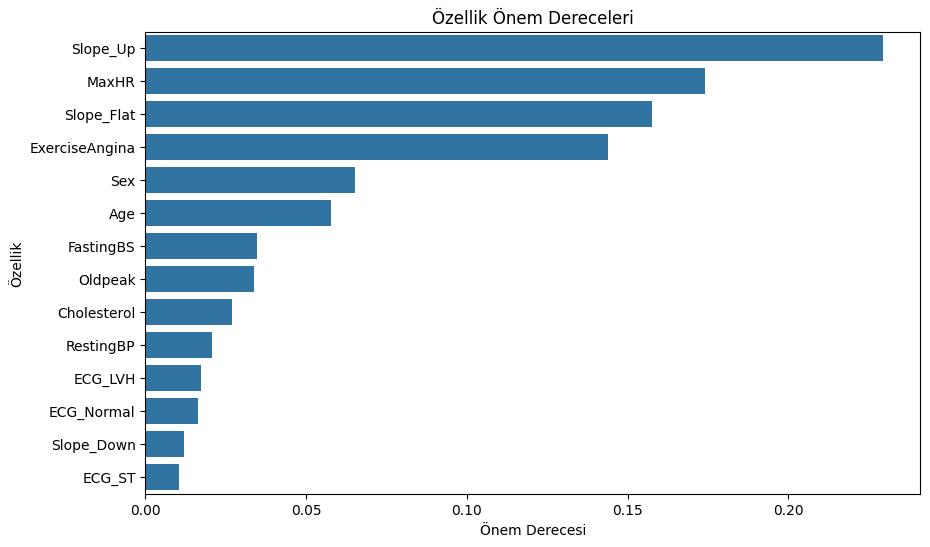

In [251]:
model = RandomForestClassifier(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100,random_state=42)
model.fit(X_train, y_train)



# Modelden özellik önemlerini al
importances = model.feature_importances_  
feature_importances = pd.DataFrame({'Özellik': X.columns, 'Önem Derecesi': importances})  
sorted_feature_importances = feature_importances.sort_values(by='Önem Derecesi', ascending=False)

# Özellik önemlerini görselleştir
plt.figure(figsize=(10, 6))  
sns.barplot(x='Önem Derecesi', y='Özellik', data=sorted_feature_importances)  
plt.title('Özellik Önem Dereceleri')  
plt.show()

# 💯 10. Modelin Doğruluk Skorunun Hesaplanması

In [252]:
# Modelin tahmin ettiği değerleri gerçek test etiketleriyle karşılaştırarak doğruluğunu hesapla
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Modelin doğruluğu şu şekilde hesaplandı: {accuracy:.4f}")

Modelin doğruluğu şu şekilde hesaplandı: 0.8043


# 📈 11. Modelin Performans Değerlendirme Raporu – Sınıflandırma Metrikleri

In [253]:
print("Modelin performans değerlendirme raporu:")
print(classification_report(y_test, y_pred))

Modelin performans değerlendirme raporu:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        77
           1       0.87      0.79      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



# 📌 12. Karmaşıklık Matrisi (Confusion Matrix) – Modelin Hata Analizi

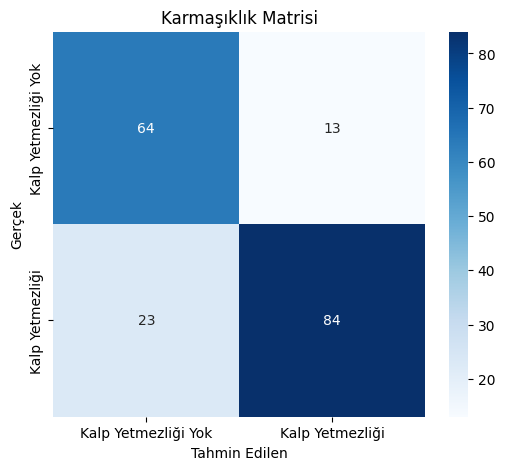

In [254]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Kalp Yetmezliği Yok', 'Kalp Yetmezliği'], 
            yticklabels=['Kalp Yetmezliği Yok', 'Kalp Yetmezliği'])

plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karmaşıklık Matrisi')
plt.show()

# 📌 13. Modelin Kaydedilmesi – joblib ile .pkl Formatında

In [255]:
import joblib  # Modeli kaydetmek ve yüklemek için
joblib.dump(model, "kalp_yetmez_onyedi_random.pkl")

['kalp_yetmez_onyedi_random.pkl']

In [256]:
# Model eğitilirken kullanılan sütun sırası
feature_order = X.columns.tolist()

print("Modele veri verirken kullanılacak doğru sıra:")
for i, col in enumerate(feature_order):
    print(f"{i+1}. {col}")


Modele veri verirken kullanılacak doğru sıra:
1. Age
2. Sex
3. RestingBP
4. Cholesterol
5. FastingBS
6. MaxHR
7. ExerciseAngina
8. Oldpeak
9. ECG_LVH
10. ECG_Normal
11. ECG_ST
12. Slope_Down
13. Slope_Flat
14. Slope_Up


In [257]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ECG_LVH,ECG_Normal,ECG_ST,Slope_Down,Slope_Flat,Slope_Up
0,0,1,1,1,0,172,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,156,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,98,0,0,0,0,0,1,0,0,1
3,0,0,1,1,0,108,1,0,1,0,1,0,0,1,0
4,0,1,1,0,0,122,0,0,0,0,1,0,0,0,1
